# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#drawing-conclusions">Drawing Conclusions</a></li>
<li><a href="#results">Communicating results</a></li>
<li><a href="#conclusions">conclusions</a></li>
</ul>

<a id='intro'></a>
## introduction 
in this project we will investigate the TMDb movie data and answer some questions to understand the relations and the trends of successful and unsuccessful movies

we will go through the 5 steps of data analysis process to answer some key questions

## research questions that we will answer in the following cells
##### Q1: Does the amount of budget affect the rating of a movie?
##### Q2: does the duration of a movie affect the rating?
##### Q3: what are the changes of different features of movies over the years?
##### Q4: what are the movies with the most gains and most losses?
##### Q5: what are the different statistics of genres? 

### important imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Assessing data

#### 1. Number of rows and columns

In [3]:
df.shape

(10866, 21)

In [4]:
# View the index number and label for each column
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


we have 
- 10866 row
- 21 column 

#### 2. Data types of the columns

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### 3.columns with missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## the columns with the missing values are
- imbd_id
- cast
- homepage
- director 
- tagline
- keywords
- overview
- genres
- production companies

#### 4.duplicated rows

In [7]:
sum(df.duplicated())

1

there is a duplicated row

#### number of unique values of average vote

In [8]:
df.vote_average.nunique()

72

In [9]:
df.vote_average.min()

1.5

In [10]:
df.vote_average.max()

9.2

### some information about other columns

In [11]:
# number of directors 
df.director.nunique()

5067

## Cleaning the dataset
we need to check for 
- non-related columns to our analysis 
    - our analysis is statistic-oriented, so we will check for the non-relevant columns for statistics
- missing data
- duplicates 
- structural problems

### duplicates 

In [12]:
sum(df.duplicated())

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().any()

False

In [15]:
# View the index number and label for each column
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


### non-related columns to our analysis
- we will drop the following columns because they aren't statistically useful 
    - id
    - imdb_id
    - homepage
    - overview
- we will also drop release_date column because we already have the release_year column 

In [16]:
columns = ['id','imdb_id','homepage','overview','release_date']
df.drop(columns,axis=1,inplace=True)

In [17]:
df.shape

(10865, 16)

we now have 16 columns after removing 5 columns and the orginal data had 21 columns so we're doing well

### Missing Data

In [18]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

- we would lose impotant data because they have missing values on 
    - tagline 
    - keywords
so we will drop these 2 lines

In [19]:
columns = ['tagline','keywords']
df.drop(columns,axis=1,inplace=True)

In [20]:
df.shape

(10865, 14)

In [21]:
# now check the missing values again 
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [22]:
# drop the missing values
df.dropna(inplace=True)

### incorrect Data types

In [23]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

they seem good so far, although we will have to split some columns later for conclusions

In [24]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

In [25]:
sns.set_theme(style="darkgrid")

First we will do some explorations 

In [26]:
df

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00


In [27]:
def plot_param(title,xlabel,ylabel=None):
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize=20)
    if ylabel is not None:
        plt.ylabel(ylabel,fontsize=20)

### Exploring with visuals

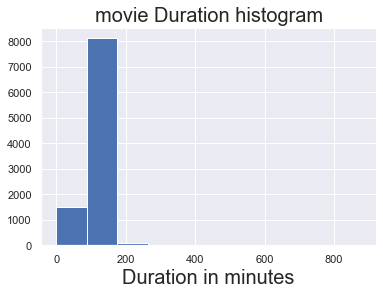

In [28]:
df.runtime.hist();
plot_param('movie Duration histogram','Duration in minutes')
matplotlib.rcParams['figure.figsize'] = [10, 10]

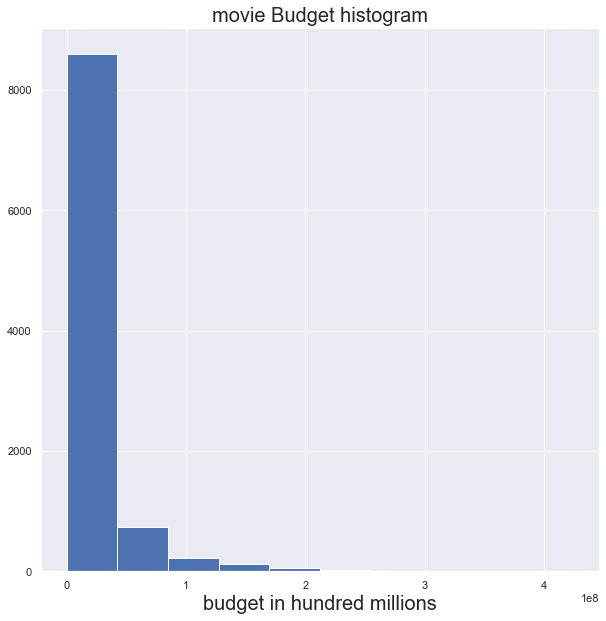

In [29]:
df.budget.hist();
plot_param('movie Budget histogram',"budget in hundred millions")


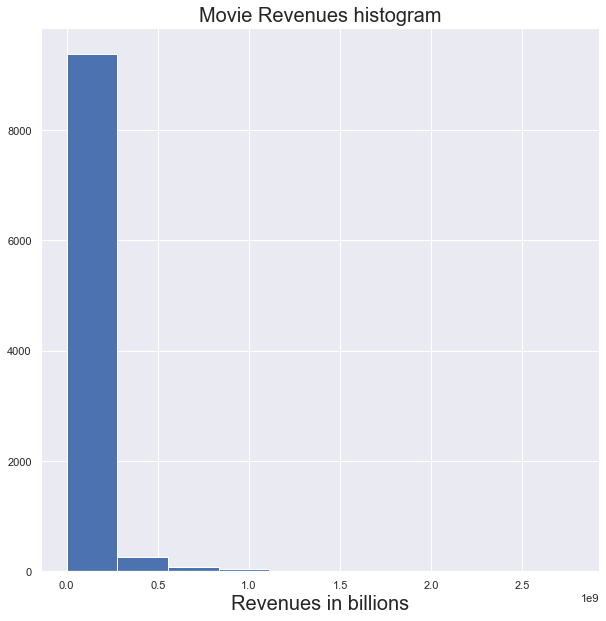

In [30]:
df.revenue.hist();
plot_param("Movie Revenues histogram",'Revenues in billions')


### Q: Does the amount of budget affect the rating of a movie?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


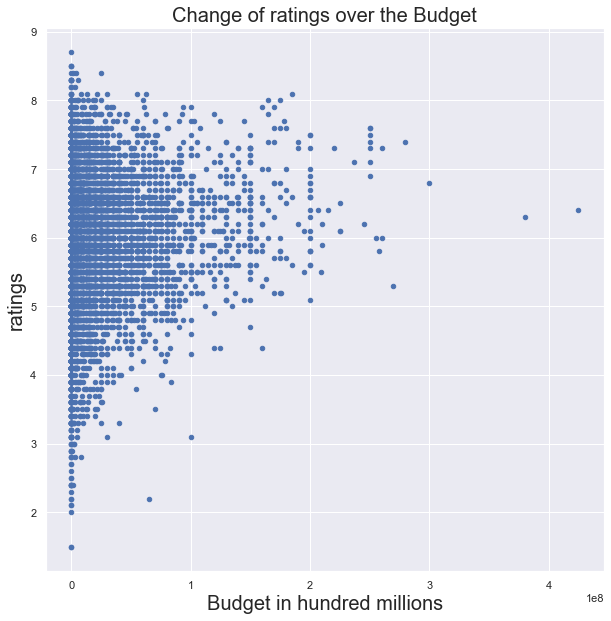

In [31]:
df.plot(x='budget',y='vote_average',kind='scatter')
plot_param('Change of ratings over the Budget','Budget in hundred millions','ratings')


### Q: does the duration of a movie affect the rating?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


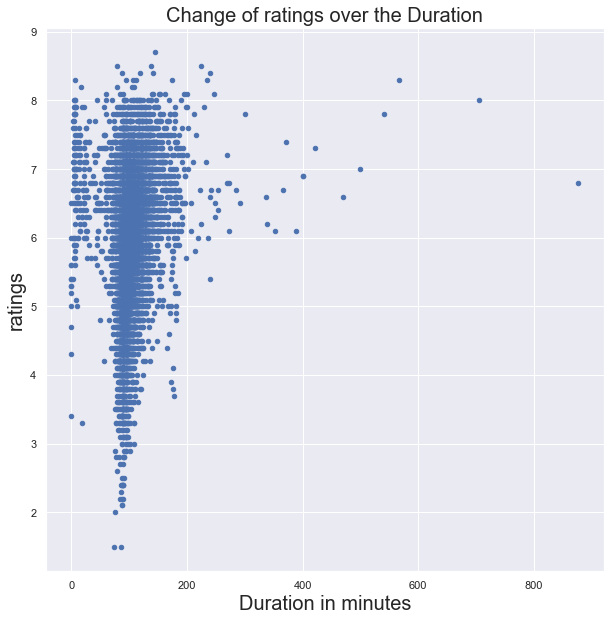

In [32]:
df.plot(x='runtime',y='vote_average',kind='scatter')
plot_param('Change of ratings over the Duration','Duration in minutes','ratings')


### Q: what are the ratings of movies over the years?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


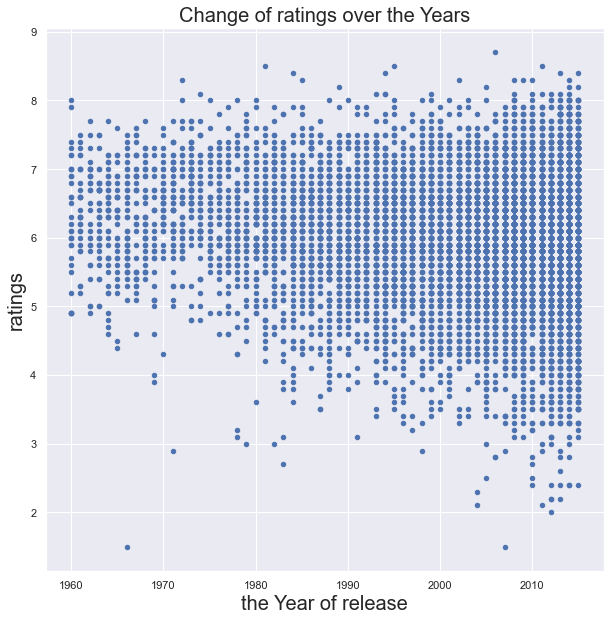

In [33]:
df.plot(x='release_year',y='vote_average',kind='scatter')
plot_param('Change of ratings over the Years','the Year of release','ratings')


<a id='drawing-conclusions'></a>
## Drawing conclusions

In [34]:
df

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00


### Q1: Does the amount of budget affect the rating of a movie?

In [35]:
median_budget = df.budget.median()
median_budget

200000.0

In [36]:
budget_low = df.query('budget < {}'.format(median_budget))


In [37]:
budget_high = df.query('budget >= {}'.format(median_budget))

In [38]:
df.shape[0] == budget_low.shape[0] + budget_high.shape[0]

True

In [39]:
print(budget_high.vote_average.mean(),budget_low.vote_average.mean())

6.048618784530396 5.878403275332647


#### we conclude that the movies with higher budget generally received higher ratings 

### Q2: does the duration of a movie affect the rating?

In [40]:
median_duration = df.runtime.median()
median_duration

100.0

In [41]:
low_duration = df.query('runtime < {}'.format(median_duration))
high_duration = df.query('runtime >= {}'.format(median_duration))
df.shape[0] == low_duration.shape[0] + high_duration.shape[0]

True

In [42]:
print(low_duration.vote_average.mean(), high_duration.vote_average.mean())

5.708451573103018 6.216215115094731


#### we conclude that movies with high duration generally received high ratings

### Q3: what are the changes of different features of movies over the years?
we want to see the changes of the following faetures over the years
- popularity
- budget
- revenue
- runtime
- ratings

we first want to categorize the years into 4 main divisions for the sake of the analysis 
- the 60s: from 1960 to 1969
- the 70s: from 1970 to 1979
- the 80s: from 1980 to 1989
- the 90s: from 1990 to 1999
- modern : from 2000 to 2015

In [43]:
df.release_year.min()

1960

In [44]:
df.release_year.max()

2015

In [45]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1959,1970,1980,1990,2000,2015]
bin_names = ['60s','70s','80s','90s','modern']

In [46]:
df['movie_era'] = pd.cut(df.release_year,bin_edges,labels=bin_names)

In [47]:
sum(df.movie_era.isnull())

0

In [48]:
df.groupby('movie_era').mean()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
movie_era,,,,,,,,,
60s,0.426550,1.822152e+06,9.240974e+06,113.284238,70.689922,6.282429,1965.165375,1.198524e+07,6.107737e+07
70s,0.510351,2.711368e+06,2.229405e+07,108.358779,122.250000,6.340840,1975.845420,9.465255e+06,8.287174e+07
80s,0.548693,7.114998e+06,3.122197e+07,104.875954,133.721374,6.063740,1986.019084,1.379764e+07,6.074940e+07
90s,0.641450,1.959015e+07,4.861805e+07,106.854765,194.194604,5.986395,1995.896096,2.694003e+07,6.796410e+07
modern,0.768222,1.884356e+07,4.934208e+07,100.333882,291.338165,5.886773,2009.310328,1.955947e+07,5.079925e+07


##### Changes of popularity over the years

In [49]:
pop_over_years = df.groupby('movie_era')['popularity'].mean()
pop_over_years

movie_era
60s       0.426550
70s       0.510351
80s       0.548693
90s       0.641450
modern    0.768222
Name: popularity, dtype: float64

we conclude that popularity of the movies increases by time, which makes sense 

##### Changes of movie budgets over the years

In [50]:
budget_over_years = df.groupby('movie_era')['budget'].mean()
budget_over_years

movie_era
60s       1.822152e+06
70s       2.711368e+06
80s       7.114998e+06
90s       1.959015e+07
modern    1.884356e+07
Name: budget, dtype: float64

we also conclude that the budget of movies increase over the years

##### Changes of movie revenues over the years

In [51]:
rev_over_years = df.groupby('movie_era')['revenue'].mean()
rev_over_years

movie_era
60s       9.240974e+06
70s       2.229405e+07
80s       3.122197e+07
90s       4.861805e+07
modern    4.934208e+07
Name: revenue, dtype: float64

movie revenues also increases by time 

##### Changes of movie durations over the years

In [52]:
duration_over_years = df.groupby('movie_era')['runtime'].mean()
duration_over_years

movie_era
60s       113.284238
70s       108.358779
80s       104.875954
90s       106.854765
modern    100.333882
Name: runtime, dtype: float64

we conclude that the durations of the movies tends to decrease over time i.e. old movies are generally longer

##### Changes of movie ratings over the years
- we want to measure the proportions as movies with alot of ratings are easier to reach the top

In [53]:
ratings = df.groupby('movie_era')['vote_average'].mean()
ratings

movie_era
60s       6.282429
70s       6.340840
80s       6.063740
90s       5.986395
modern    5.886773
Name: vote_average, dtype: float64

In [54]:
df.groupby('movie_era')['vote_count'].mean()

movie_era
60s        70.689922
70s       122.250000
80s       133.721374
90s       194.194604
modern    291.338165
Name: vote_count, dtype: float64

In [55]:
rating_proportions = df.groupby('movie_era')['vote_average'].mean() / df.groupby('movie_era')['vote_count'].mean()
rating_proportions

movie_era
60s       0.088873
70s       0.051868
80s       0.045346
90s       0.030827
modern    0.020206
dtype: float64

we conclude that old movies are generally better 

### Q4: what are the movies with the most gains and most losses?

In [56]:
df['money_gain'] = df['revenue'] - df['budget']
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_era,money_gain
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,modern,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,modern,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,modern,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,modern,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,modern,1316249360


In [57]:
df['money_gain'].describe()

count    9.772000e+03
mean     2.805154e+07
std      1.014445e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.420195e+07
max      2.544506e+09
Name: money_gain, dtype: float64

In [58]:
most_gains = df.sort_values('money_gain',ascending=False).head(5)
most_gains

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_era,money_gain
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09,modern,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,modern,1868178225
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,2.716921e+08,2.506406e+09,90s,1645034188
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,modern,1363528810
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,modern,1316249360


In [59]:
most_losses = df.sort_values('money_gain').head(10)
most_losses

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_era,money_gain
2244,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010,4.250000e+08,1.108757e+07,modern,-413912431
5508,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,1607,6.0,2013,2.386885e+08,8.357833e+07,modern,-165710090
2069,0.642475,150000000,0,The Wolfman,Benicio del Toro|Anthony Hopkins|Emily Blunt|H...,Joe Johnston,102,Horror|Thriller|Drama,Universal Pictures|Stuber Productions|Relativi...,299,5.4,2010,1.500000e+08,0.000000e+00,modern,-150000000
2214,0.757082,120000000,0,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,183,7.8,2010,1.200000e+08,0.000000e+00,modern,-120000000
7031,0.948560,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,60,5.9,2004,1.673946e+08,2.980774e+07,modern,-119180039
3484,0.921653,150000000,38992758,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,88,Adventure|Animation|Family,Walt Disney Animation Studios,129,5.5,2011,1.454097e+08,3.779950e+07,modern,-111007242
2190,0.334115,104002432,0,Double Wedding,Tia Mowry|Tamera Mowry|Ardon Bess|Robin BrÃ»lÃ...,Craig Pryce,87,Comedy|Drama|Romance,Jaffe / Braunstein Enterprise|Lifetime Network,12,5.3,2010,1.040024e+08,0.000000e+00,modern,-104002432
1696,0.322320,100000000,0,Dragonball Evolution,Justin Chatwin|Joon Park|Jamie Chung|Emmy Ross...,James Wong,85,Action|Adventure|Fantasy|Science Fiction|Thriller,Ingenious Film Partners|Twentieth Century Fox ...,261,3.1,2009,1.016400e+08,0.000000e+00,modern,-100000000
4970,1.653031,100000000,250,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,85,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,753,6.8,2003,1.185353e+08,2.963382e+02,modern,-99999750
2435,1.189386,160000000,61698899,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,102,Adventure|Fantasy|Action,Touchstone Pictures,275,6.2,1999,2.094485e+08,8.076712e+07,90s,-98301101


### Q5: what are the different statistics of genres? 

In [60]:
df['genres'] = df['genres'].str.split('|')

In [61]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_era,money_gain
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,modern,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,modern,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,modern,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,modern,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,modern,1316249360


In [62]:
genres_df = df.explode("genres").reset_index(drop=True)
genres_df

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_era,money_gain
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,modern,1363528810
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,modern,1363528810
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,modern,1363528810
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,modern,1363528810
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,modern,228436354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24645,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,60s,0
24646,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Comedy,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,60s,0
24647,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,60s,0
24648,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,60s,0


In [63]:
genres_df.groupby('genres').mean()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,money_gain
genres,,,,,,,,,,
Action,0.968256,2.946214e+07,7.759165e+07,105.516331,417.643400,5.796823,1999.875168,3.500696e+07,9.781054e+07,4.812951e+07
Adventure,1.209053,3.981309e+07,1.201717e+08,106.294075,543.687861,5.951951,1999.216040,4.659343e+07,1.504634e+08,8.035860e+07
Animation,0.914281,2.617218e+07,8.517872e+07,70.871961,339.369530,6.387358,2004.136143,2.856795e+07,9.648818e+07,5.900653e+07
Comedy,0.631565,1.462095e+07,4.140442e+07,97.361200,192.646665,5.894553,2000.443635,1.751002e+07,5.285240e+07,2.678348e+07
Crime,0.767337,1.834387e+07,4.415599e+07,107.026944,289.638953,6.128637,1999.237105,2.236703e+07,5.902647e+07,2.581212e+07
Documentary,0.217167,8.449726e+05,3.163370e+06,101.911672,43.968454,6.930915,2008.097792,9.001120e+05,3.510897e+06,2.318398e+06
Drama,0.625878,1.287987e+07,3.182763e+07,110.890926,197.187672,6.178391,2000.526123,1.611420e+07,4.402312e+07,1.894777e+07
Family,0.846467,2.610785e+07,8.129599e+07,89.710502,302.833790,6.002557,2000.562557,3.009340e+07,9.844916e+07,5.518814e+07
Fantasy,1.056310,3.551363e+07,1.050024e+08,100.853571,456.454762,5.884524,2000.189286,4.075680e+07,1.212249e+08,6.948878e+07


#### genres that made more money

In [64]:
genres_money = genres_df.groupby('genres')['money_gain'].mean().sort_values(ascending=False).head(5)
genres_money

genres
Adventure          8.035860e+07
Fantasy            6.948878e+07
Animation          5.900653e+07
Family             5.518814e+07
Science Fiction    4.887963e+07
Name: money_gain, dtype: float64

##### genres that have the most popularity 

In [65]:
genres_popularity = genres_df.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(5)
genres_popularity

genres
Adventure          1.209053
Science Fiction    1.065278
Fantasy            1.056310
Action             0.968256
Animation          0.914281
Name: popularity, dtype: float64

### favourite genres overtime

In [66]:
genres_over_time = genres_df.groupby(['movie_era','genres'])['vote_average'].mean()
genres_over_time

movie_era  genres         
60s        Action             6.132558
           Adventure          6.289855
           Animation          6.620000
           Comedy             6.207500
           Crime              6.440426
                                ...   
modern     Science Fiction    5.620905
           TV Movie           5.667010
           Thriller           5.625903
           War                6.315827
           Western            5.900000
Name: vote_average, Length: 100, dtype: float64

In [67]:
eras = []
for era in df.movie_era.unique():
    eras.append(genres_over_time[era].sort_values(ascending=False).head(5))
eras

[genres
 Documentary    6.903571
 History        6.426901
 Music          6.404061
 Animation      6.358531
 War            6.315827
 Name: vote_average, dtype: float64,
 genres
 Documentary    6.771429
 Crime          6.669767
 Music          6.566667
 Drama          6.468400
 Animation      6.426667
 Name: vote_average, dtype: float64,
 genres
 Documentary    7.111111
 Music          6.442308
 History        6.371429
 War            6.370968
 Animation      6.368478
 Name: vote_average, dtype: float64,
 genres
 Documentary    7.757143
 Animation      6.731250
 History        6.564286
 Music          6.400000
 Western        6.327273
 Name: vote_average, dtype: float64,
 genres
 TV Movie       6.933333
 Documentary    6.880000
 Animation      6.620000
 Crime          6.440426
 Family         6.417500
 Name: vote_average, dtype: float64]

In [68]:
genres_over_time['60s'].sort_values(ascending=False).head(5)

genres
TV Movie       6.933333
Documentary    6.880000
Animation      6.620000
Crime          6.440426
Family         6.417500
Name: vote_average, dtype: float64

<a id='results'></a>
## communicating results

### Q1: Does the amount of budget affect the rating of a movie?

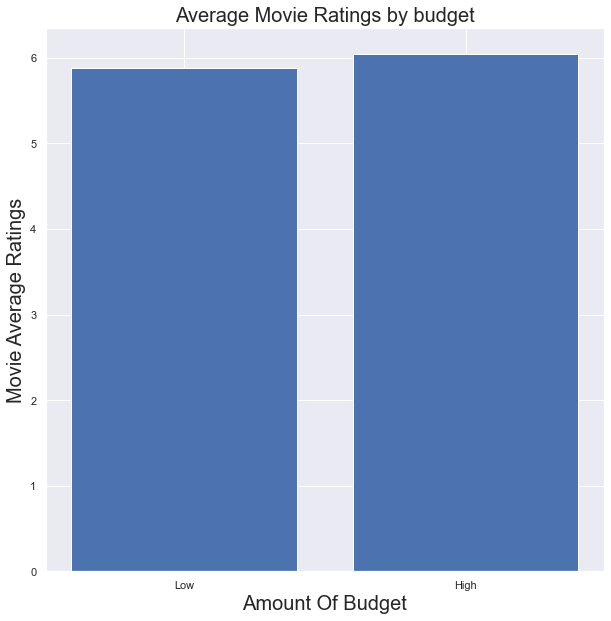

In [69]:
locations = [1, 2]
heights = [budget_low.vote_average.mean(), budget_high.vote_average.mean()]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plot_param('Average Movie Ratings by budget','Amount Of Budget','Movie Average Ratings')


#### we conclude that the movies with higher budget generally received higher ratings 

### Q2: does the duration of a movie affect the rating?

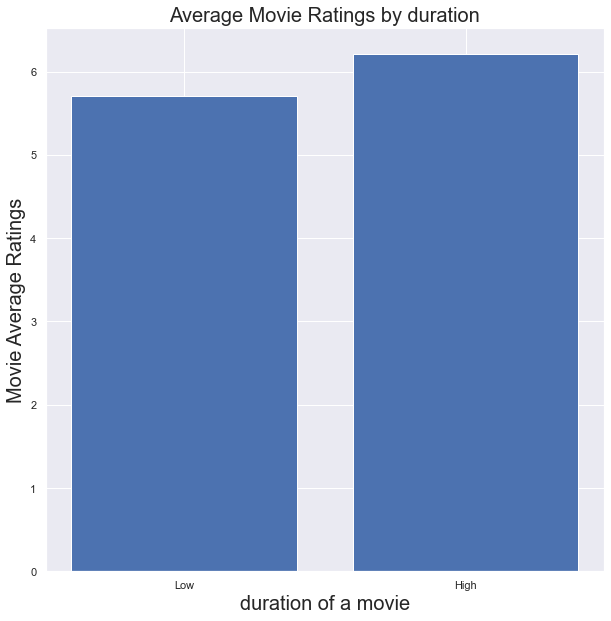

In [70]:
locations = [1, 2]
heights = [low_duration.vote_average.mean(), high_duration.vote_average.mean()]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plot_param('Average Movie Ratings by duration','duration of a movie','Movie Average Ratings')

#### we conclude that movies with high duration generally received high ratings

### Q3: what are the changes of different features of movies over the years?

##### Changes of popularity over the years

C:\Users\yousef.DESKTOP-PKSNIQM\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


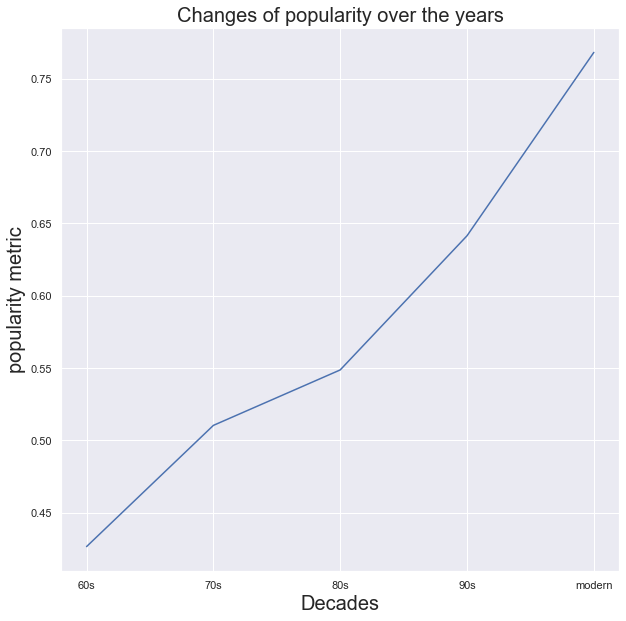

In [71]:
plt.plot(pop_over_years);
plot_param('Changes of popularity over the years','Decades','popularity metric')

##### Changes of movie budgets over the years

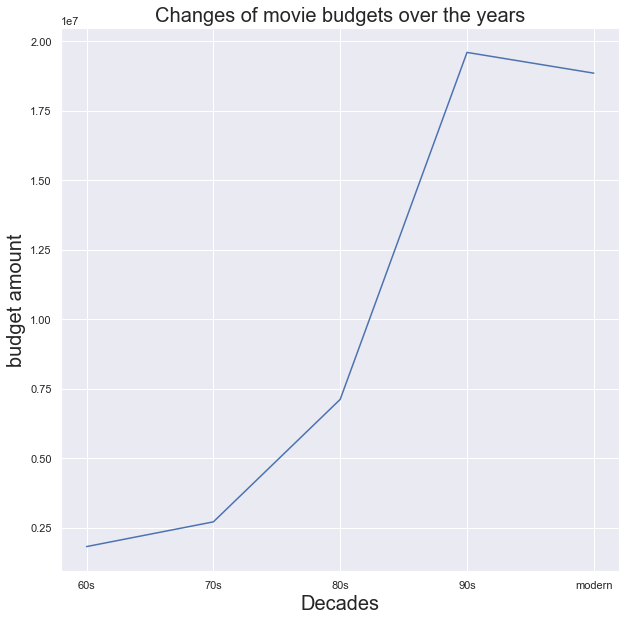

In [72]:
plt.plot(budget_over_years);
plot_param('Changes of movie budgets over the years','Decades','budget amount')

##### Changes of movie revenues over the years

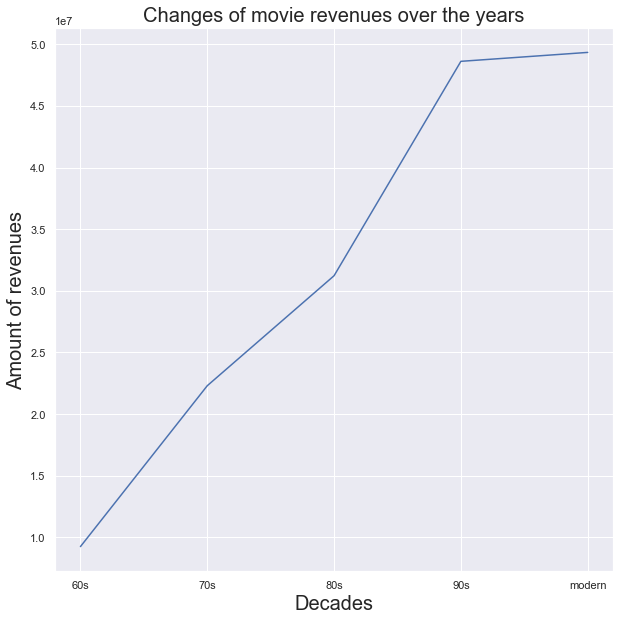

In [73]:
plt.plot(rev_over_years);
plot_param('Changes of movie revenues over the years','Decades','Amount of revenues')
plt.xlabel("Decades",fontsize=20);
plt.ylabel("Amount of revenues",fontsize=20);
plt.title("Changes of movie revenues over the years",fontsize=20);

##### Changes of movie durations over the years

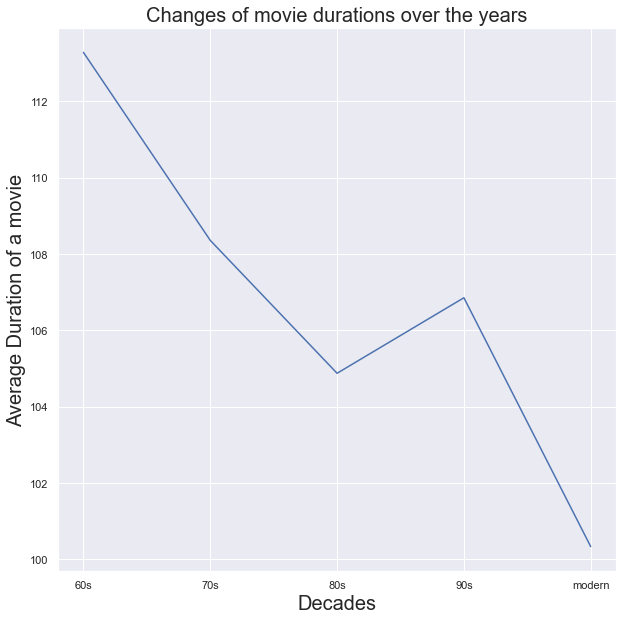

In [74]:
plt.plot(duration_over_years);
plot_param('Changes of movie durations over the years','Decades','Average Duration of a movie')

##### Changes of movie ratings over the years

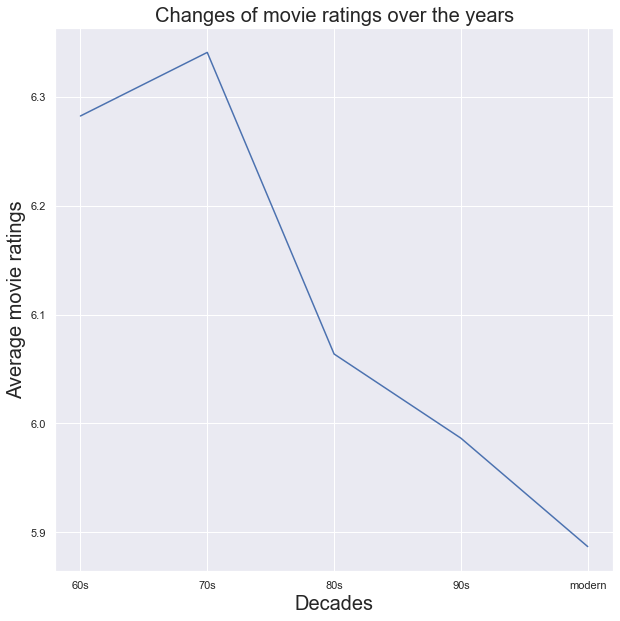

In [75]:
plt.plot(ratings);
plot_param('Changes of movie ratings over the years','Decades','Average movie ratings')

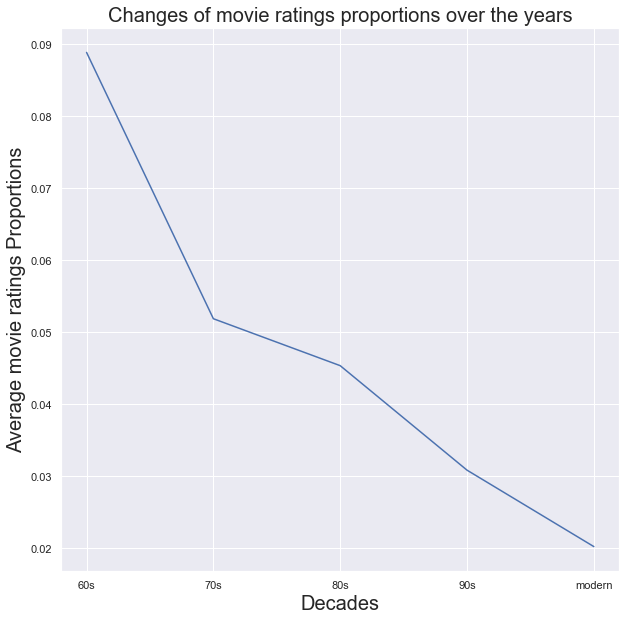

In [76]:
plt.plot(rating_proportions);
plot_param('Changes of movie ratings proportions over the years','Decades','Average movie ratings Proportions')

we conclude that old movies are generally better 

### Q4: what are the movies with the most gains ?

In [77]:
most_gains.original_title.loc[3] = most_gains.original_title.loc[3].split(':')[0];

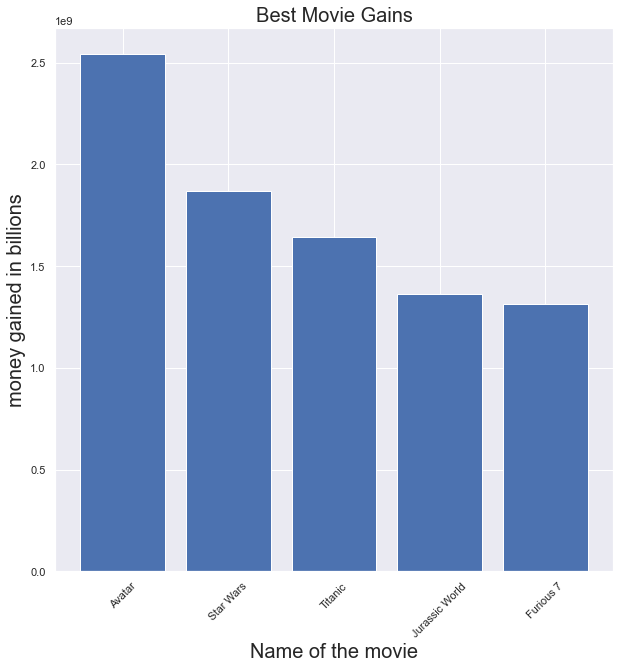

In [78]:
locations = np.arange(0,len(most_gains));
heights = most_gains.money_gain.values;
labels = most_gains.original_title.values
plt.bar(locations, heights, tick_label=labels);
plot_param('Best Movie Gains','Name of the movie','money gained in billions')
plt.xticks(rotation=45);


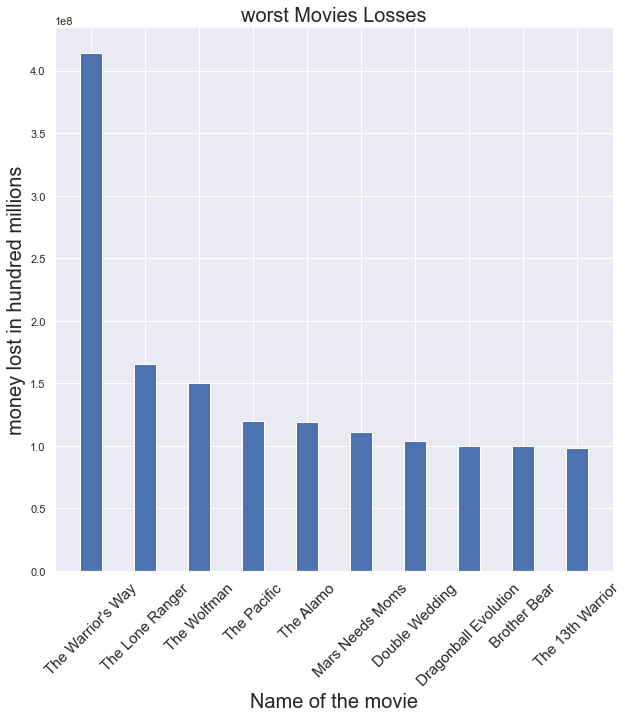

In [79]:
locations = np.arange(0,len(most_losses)*2,2)
heights = abs(most_losses.money_gain.values)
labels = most_losses.original_title.values
plt.bar(locations, heights)
plot_param('worst Movies Losses','Name of the movie','money lost in hundred millions')
plt.xticks(locations,labels, rotation=45,fontsize=15)
matplotlib.rcParams['figure.figsize'] = [10, 10]

### Q5: what are the different statistics of genres? 

#### genres that made more money

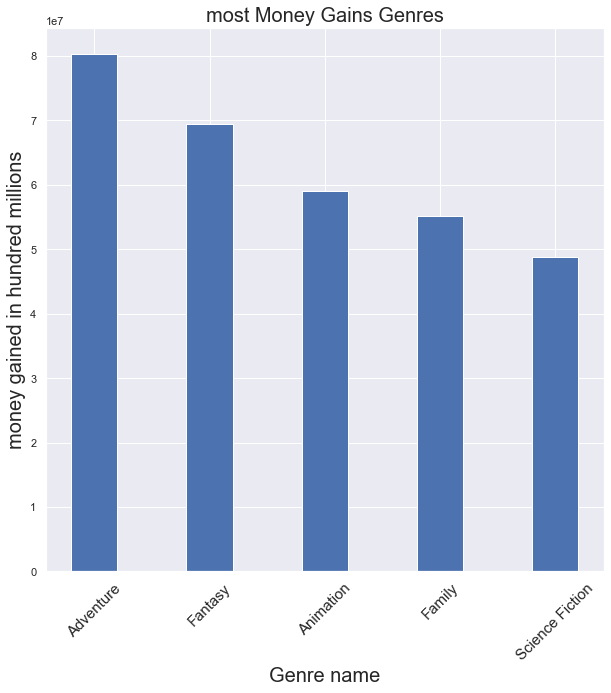

In [80]:
locations = np.arange(0,len(genres_money)*2,2)
heights = genres_money.values
labels = genres_money.index
plt.bar(locations, heights)
plot_param('most Money Gains Genres','Genre name','money gained in hundred millions')
plt.xticks(locations,labels, rotation=45,fontsize=15)
matplotlib.rcParams['figure.figsize'] = [10, 10]

##### genres that have the most popularity 

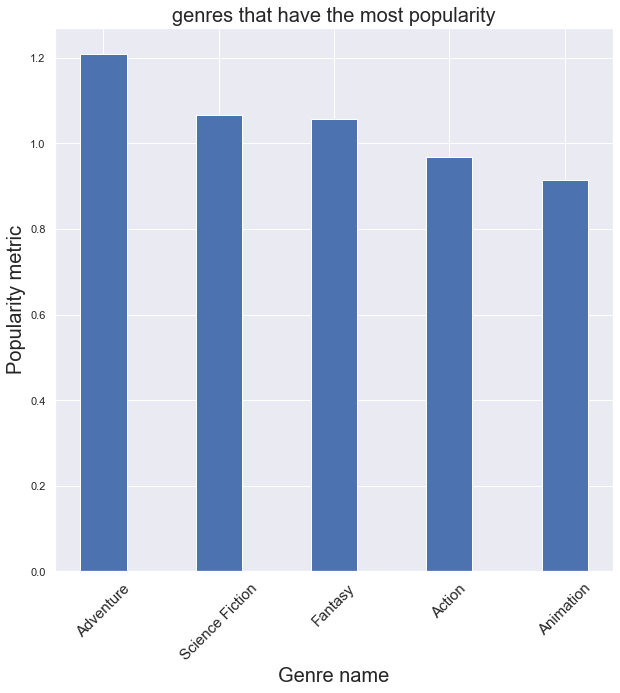

In [81]:
locations = np.arange(0,len(genres_popularity)*2,2)
heights = genres_popularity.values
labels = genres_popularity.index
plt.bar(locations, heights)
plot_param('genres that have the most popularity','Genre name','Popularity metric')
plt.xticks(locations,labels, rotation=45,fontsize=15)
matplotlib.rcParams['figure.figsize'] = [10, 10]

### favourite genres overtime

In [82]:
eras

[genres
 Documentary    6.903571
 History        6.426901
 Music          6.404061
 Animation      6.358531
 War            6.315827
 Name: vote_average, dtype: float64,
 genres
 Documentary    6.771429
 Crime          6.669767
 Music          6.566667
 Drama          6.468400
 Animation      6.426667
 Name: vote_average, dtype: float64,
 genres
 Documentary    7.111111
 Music          6.442308
 History        6.371429
 War            6.370968
 Animation      6.368478
 Name: vote_average, dtype: float64,
 genres
 Documentary    7.757143
 Animation      6.731250
 History        6.564286
 Music          6.400000
 Western        6.327273
 Name: vote_average, dtype: float64,
 genres
 TV Movie       6.933333
 Documentary    6.880000
 Animation      6.620000
 Crime          6.440426
 Family         6.417500
 Name: vote_average, dtype: float64]

we will enumerate on the list and plots using a for loop to avoid repetitive code.

Text(0.5, 1.0, 'highest average genres ratings in the twenties')

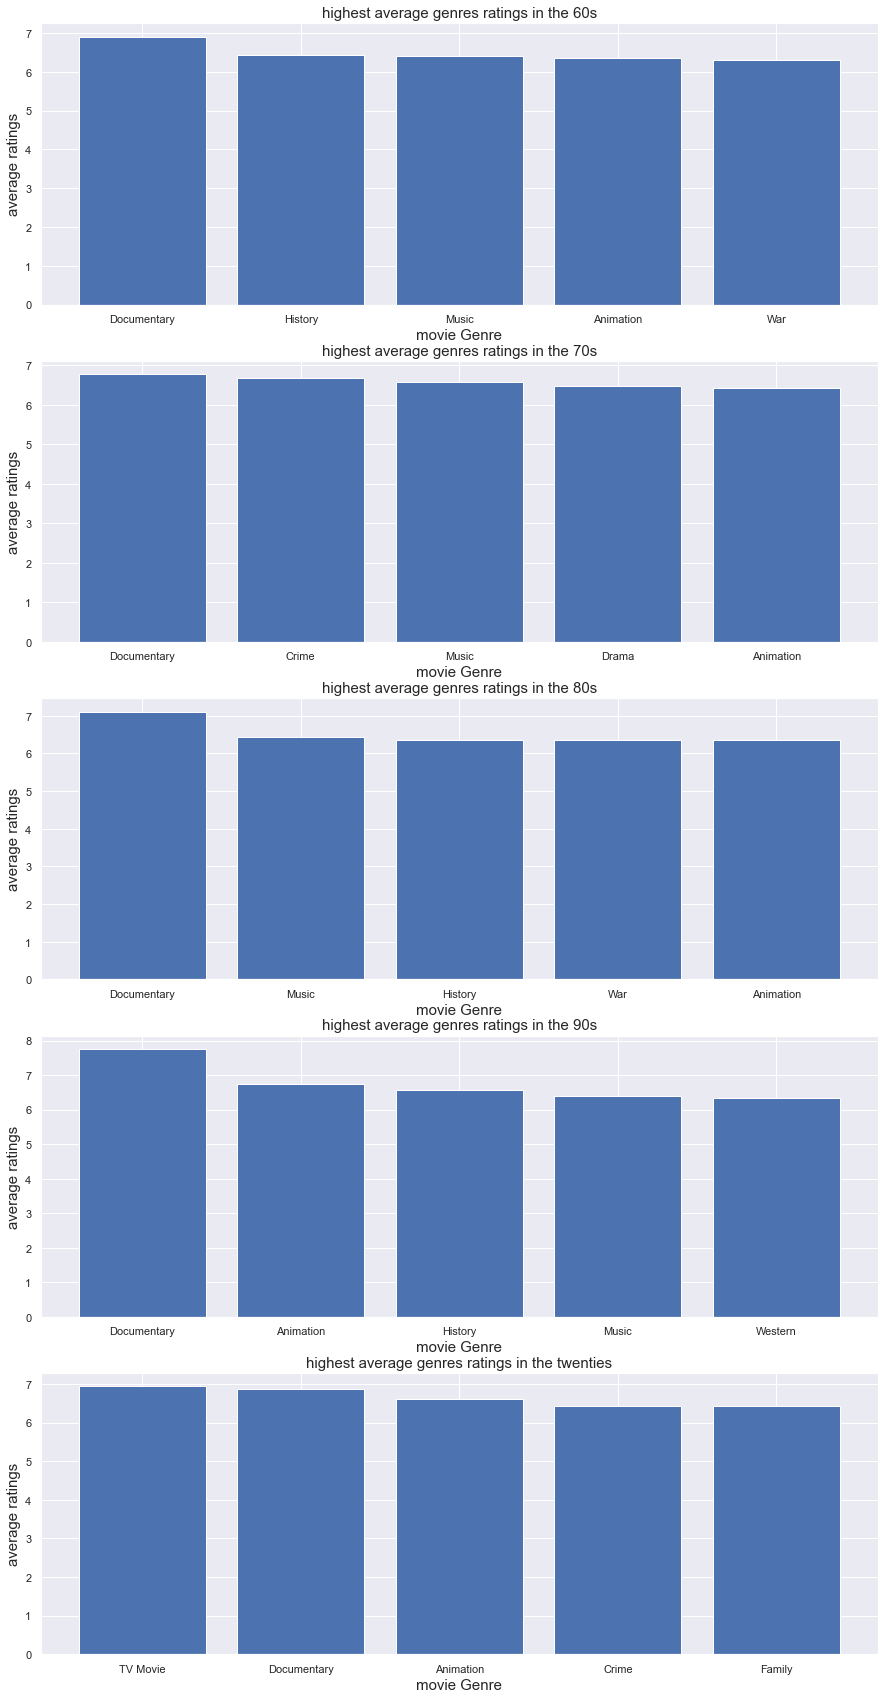

In [83]:
fig, axes = plt.subplots(nrows=5,ncols=1,figsize=(15,30))

for index, era in enumerate(eras):
    axes[index].bar(eras[index].index,eras[index].values)
    axes[index].set_xlabel("movie Genre",fontsize=15)
    axes[index].set_ylabel("average ratings",fontsize=15)

axes[0].set_title('highest average genres ratings in the 60s',fontsize=15)
axes[1].set_title('highest average genres ratings in the 70s',fontsize=15)
axes[2].set_title('highest average genres ratings in the 80s',fontsize=15)
axes[3].set_title('highest average genres ratings in the 90s',fontsize=15)
axes[4].set_title('highest average genres ratings in the twenties',fontsize=15)

<a id='conclusions'></a>
## Conclusions

in the first section (questions 1 and 2) i investigated the variables or features that might affect a movie's rating like the budget or the duration of the movie (for example, would people find it interesting to watch a very long movie or short movie) and i found out that longer and more expensive movies are usually more amusing and received more ratings by the viewers

then in the second section (question 3) i saw how did movies change over the decades. how did the budget, ratings, duration, revenues and popularity of the movies change over time and i found out that 
- the popularity increases when the year of the production increases, which might state that the majority of the viewers watching the movies nowadays are probably young) 
- the budget of the movies increased over the years, which might state that the productivity, technology and also the movie industry was becoming more and more benefitial oer the years until it hit the peak at the 90s and if we look at the curve of the revenues over the years we see that it has also started to kind of saturate after the 90s (which explains why companies didn't keep allocating more budget for the movies)
- the duration of the movies didn't have a stable change and kept rising and decreasing over the years, with the modern movies are keeping to become shorter 
- the change of the ratings over the year clearly states that people prefer older movies than modern movies, despite having more revenues as the production year increases 

then in the third section (question 4) we saw some statistics of the most successful movies and the worst movies in terms of gains to budget ratio 

in the fourth and final section, we looked at the favourite genres of movies over the years, and there are enourmous things to conclude from the results but the most facinating note that i found is that the documentaries was the most favourite genre throughout the decades until TV movies took over in the modern era (from 2000 and later on) 

## limitations 
clearly the most obvious limitation in this investigation is the different number of viewers for the movies, as it wouldn't be fair to compare between the movies of high number of views with the movies of low number of views 

as a solution i compared the proportions of the movies, which is the ratings of a movie divided by the views count 

the second limitation that might be in here is that how random was the dataset taken? and wither we can generalize the conclusions of this dataset on the population 